<a href="https://colab.research.google.com/github/Mili3101/retail-sales-analysis/blob/development/Visualizaci%C3%B3n_para_ciencia_de_datos_Proyecto_I_Parte_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Añadimos path de datos previamente procesados
path = "/content/drive/MyDrive/Data Science - Skillnet/Ejercicios Core/BBDD/retail_sales_processed.csv"
df = pd.read_csv(path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   object        
 3   gender            1000 non-null   object        
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   object        
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
 9   clase_ventas      1000 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 78.3+ KB


In [4]:
# Convertir la columna Date a datetime
df['date'] = pd.to_datetime(df['date'])

#

In [6]:
numeric_cols = ['age', 'quantity', 'price_per_unit', 'total_amount']

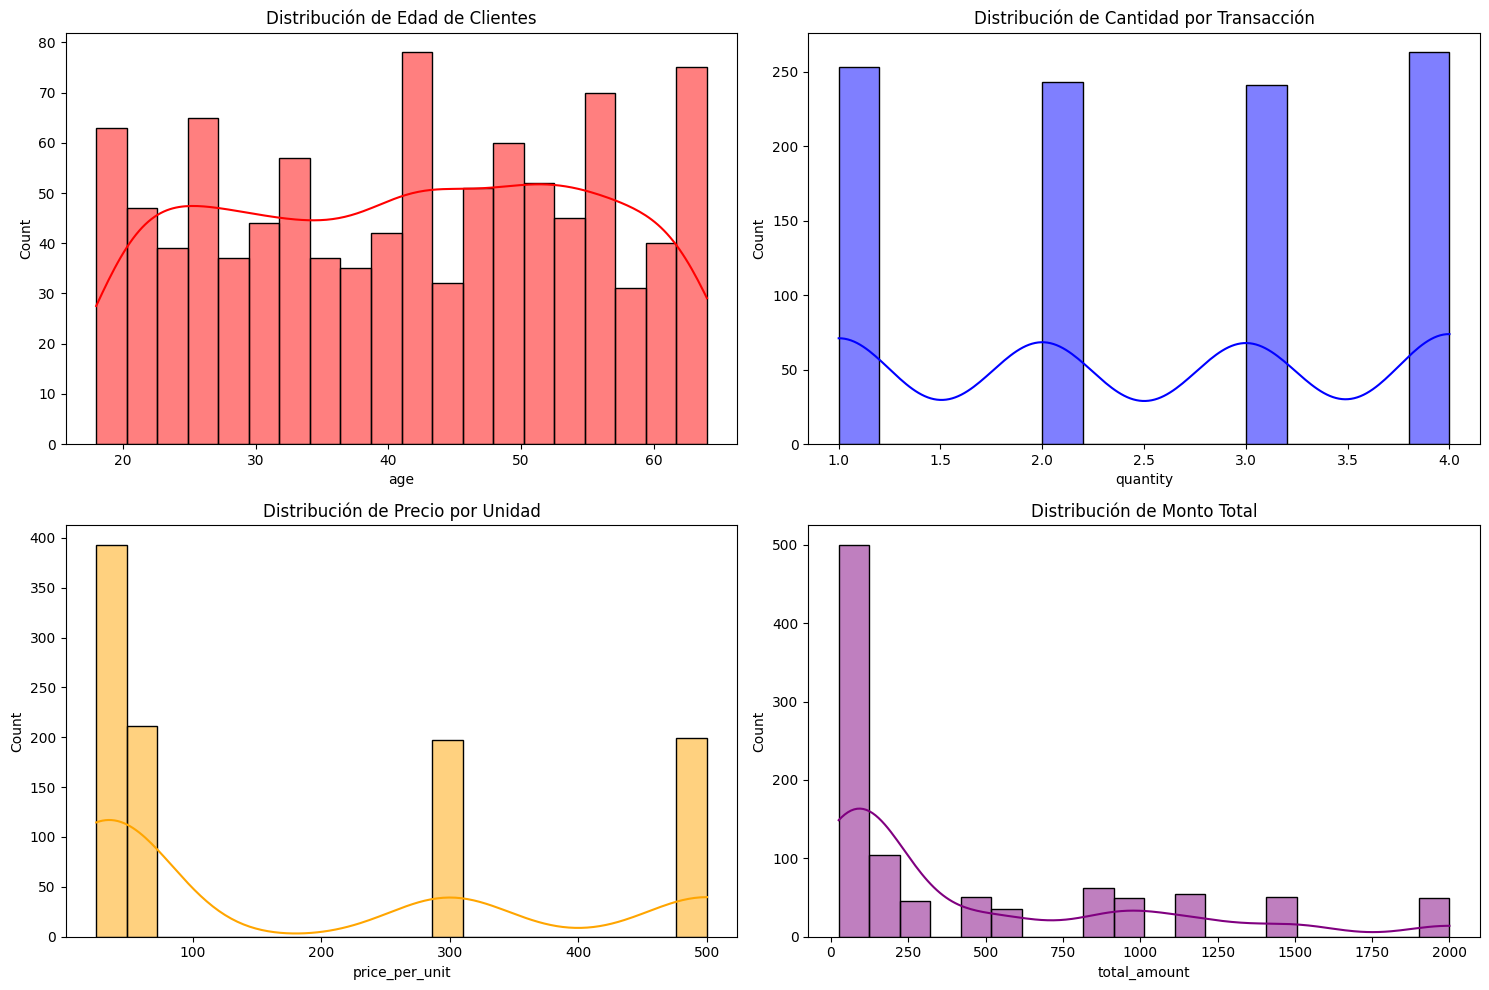

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, bins=20, color='red')
plt.title('Distribución de Edad de Clientes')

plt.subplot(2, 2, 2)
sns.histplot(df['quantity'], kde=True, bins=15, color='blue')
plt.title('Distribución de Cantidad por Transacción')

plt.subplot(2, 2, 3)
sns.histplot(df['price_per_unit'], kde=True, bins=20, color='orange')
plt.title('Distribución de Precio por Unidad')

plt.subplot(2, 2, 4)
sns.histplot(df['total_amount'], kde=True, bins=20, color='purple')
plt.title('Distribución de Monto Total')

plt.tight_layout()
plt.show()

"""
Análisis distribución de Edad de Clientes:
Se observan picos principales alrededor de los 20, 30-40 y 50-60 años, ausencia casi completa de clientes menores de 20 años.
Lo observado sugiere que es una buena oportunidad para desarrollar productos/services para atender el grupo sub-20 actualmente no alcanzado.
Además se sugiere: se pueden desarrollar programas especiales para adultos mayores para captar más clientes en ese rango.

Análisis distribución de Precio por Unidad:
El análisis de precios revela que el 95% de los productos se concentran en el rango de 1.5-3.5, con un precio modal alrededor de 2.5 que representa la opción más popular entre los clientes.
 La notable ausencia de productos por encima de 3.5 sugiere una carencia en la oferta premium o posibles barreras psicológicas de precio.
Como recomendaciones clave, se sugiere:
1) evaluar la rentabilidad de mantener los pocos productos existentes por encima de 3.5, considerando su bajo volumen.
2) aprovechar estratégicamente el umbral de 3.5 como anclaje para promociones y escalamiento de precios.
3) fortalecer el desarrollo y promoción de productos en el rango de 2.5, donde se evidencia mayor aceptación natural del mercado.

Análisis de Cantidad por transacción:
La distribución de compras muestra que la mayoría adquiere 1-3 unidades (pico en 1), con pocos pedidos grandes (>10 unidades).
Como recomendaciones, se sugiere:
1) Descuentos por volumen para aumentar artículos/compra.
2) Paquetes de 2-3 unidades (adaptados al patrón natural).
3) Investigar compras masivas para desarrollar clientes corporativos o mayoristas.

Análisis de Distribución por Monto Total:
El análisis revela que el 70-80% de las transacciones son pequeñas (0-$500), mientras que un 5-10% supera los $1500, siendo estas últimas clave para los ingresos.
Como recomendaciones, se sugiere:
1) Programas de fidelización para elevar transacciones pequeñas a medianas (500-1500).
2) Trato VIP a compradores de montos altos (>1500) para retenerlos.
3) Evaluar si promociones actuales reducen el ticket promedio.
"""

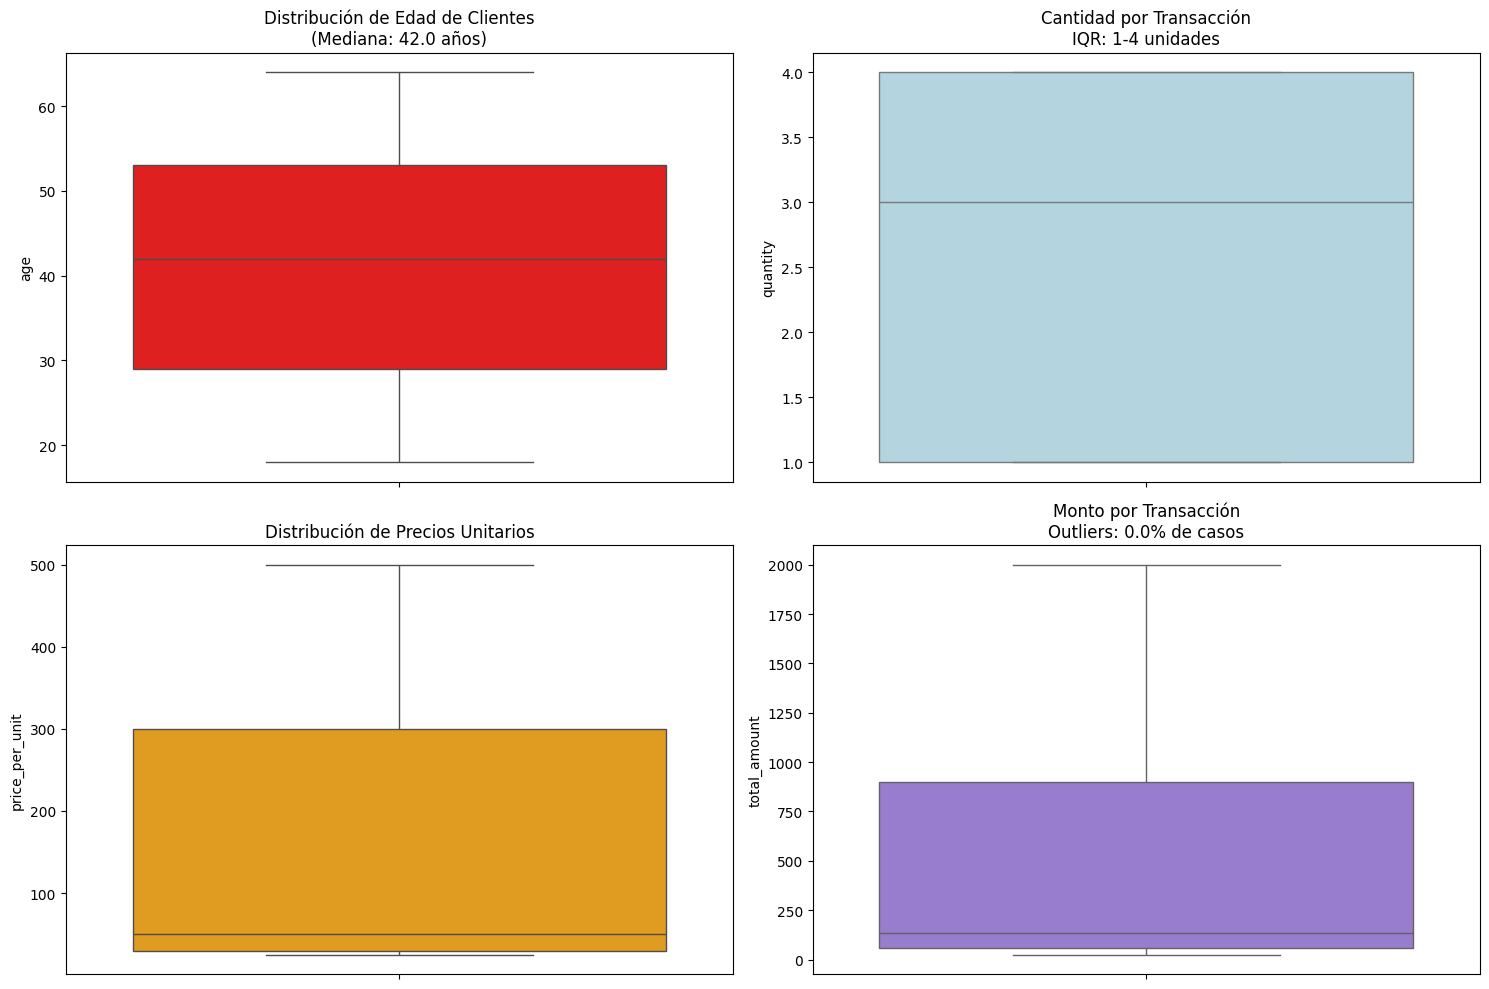

In [ ]:
plt.figure(figsize=(15, 10))  # Aumentar tamaño para mejor legibilidad

# Boxplot Edad
plt.subplot(2, 2, 1)
ax = sns.boxplot(y=df['age'], color='red')
plt.title('Distribución de Edad de Clientes\n(Mediana: {:.1f} años)'.format(df['age'].median()))

# Boxplot Cantidad
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df['quantity'], color='lightblue')
plt.title('Cantidad por Transacción\nIQR: {:.0f}-{:.0f} unidades'.format(
    df['quantity'].quantile(0.25),
    df['quantity'].quantile(0.75)))

# Boxplot Precio Unitario
plt.subplot(2, 2, 3)
ax = sns.boxplot(y=df['price_per_unit'], color='orange')
plt.title('Distribución de Precios Unitarios')

# Boxplot Monto Total
plt.subplot(2, 2, 4)
ax = sns.boxplot(y=df['total_amount'], color='mediumpurple')
plt.title('Monto por Transacción\nOutliers: {:.1f}% de casos'.format(
    (len(df[df['total_amount'] > df['total_amount'].quantile(0.75) + 1.5*(df['total_amount'].quantile(0.75)-df['total_amount'].quantile(0.25))])/len(df))*100))

plt.tight_layout()
plt.show()

"""
Los gráficos muestran que la edad mediana de los clientes es 42 años, con precios unitarios concentrados entre $200-$800 (sin outliers), y un rango de 1-4 unidades por transacción.
La ausencia de outliers en montos sugiere patrones de compra homogéneos.
Como recomendaciones, se sugiere:
1) Optimizar el mix de productos en el rango de precios $200-$500 donde hay mayor densidad.
2)Se recomienda investigar por qué no existen compras atípicas (outliers 0%), lo que podría indicar falta de opciones premium o barreras en compras corporativas.
"""


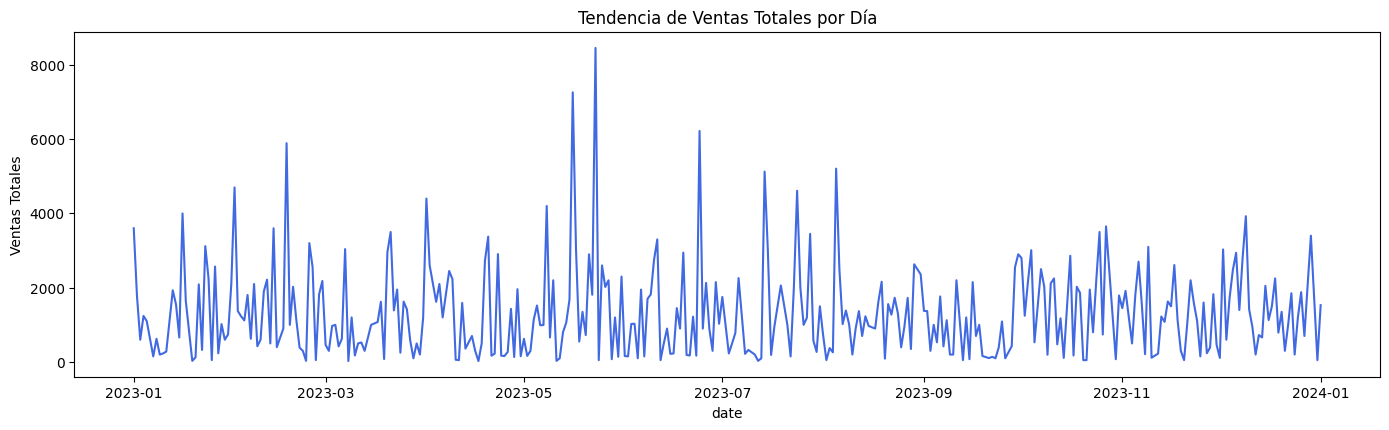

In [ ]:
# Agrupar por fecha y calcular métricas
sales_trend = df.groupby('date').agg({
    'total_amount': 'sum',
    'quantity': 'sum',
    'transaction_id': 'count'
}).rename(columns={'transaction_id': 'transaction_count'})

# Gráfico de líneas para tendencias
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
sns.lineplot(data=sales_trend, x='date', y='total_amount', color='royalblue')
plt.title('Tendencia de Ventas Totales por Día')
plt.ylabel('Ventas Totales')

plt.tight_layout()
plt.show()

"""
Análisis: La tendencia muestra fluctuaciones estacionales con picos en marzo y noviembre (posiblemente por eventos comerciales) y valles en enero y julio.
Las ventas presentan una ligera tendencia ascendente a lo largo del año.

Como recomendaciones, se sugiere:

1)Capitalizar los períodos de alta demanda (marzo/noviembre) con promociones especiales.

2)Implementar campañas preventivas para los meses de baja (enero/julio).

3)Analizar causas específicas de los picos/descensos para replicar estrategias exitosas.
"""

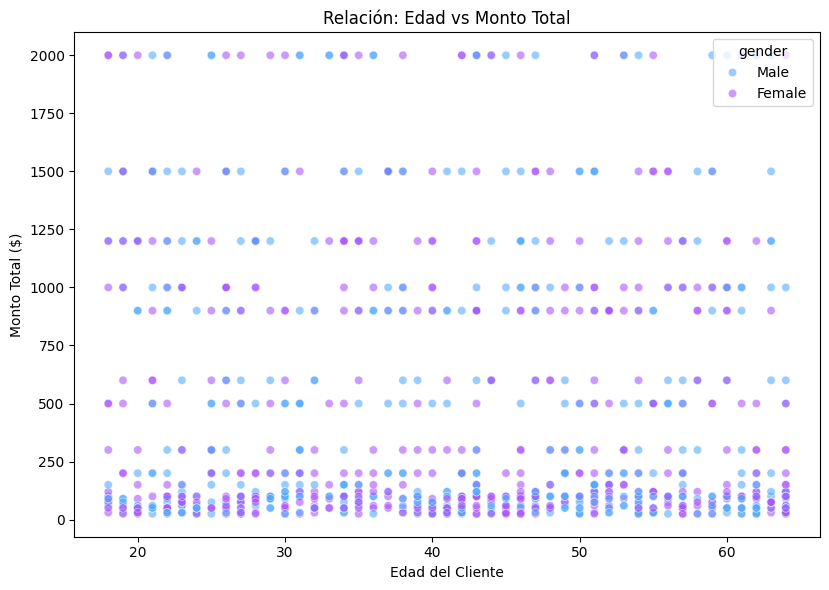

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='age', y='total_amount',
                hue='gender', palette='cool', alpha=0.6)
plt.title('Relación: Edad vs Monto Total')
plt.xlabel('Edad del Cliente')
plt.ylabel('Monto Total ($)')

plt.tight_layout()
plt.show()
"""
El gráfico muestra que los clientes entre 30-50 años generan los mayores montos, con diferencias por género (hombres gastan más en edades altas, mujeres en medias).
Se observa una curva en forma de campana con pico alrededor de los 40 años.

Como recomendaciones, se sugiere:

1) Desarrollar programas de fidelización para el grupo 30-50 años (mayor potencial de gasto).

2) Crear estrategias de marketing diferenciadas por género y edad.

3) Analizar el porqué del menor gasto en jóvenes (<30) y mayores (>60) para captar estos segmentos.
"""

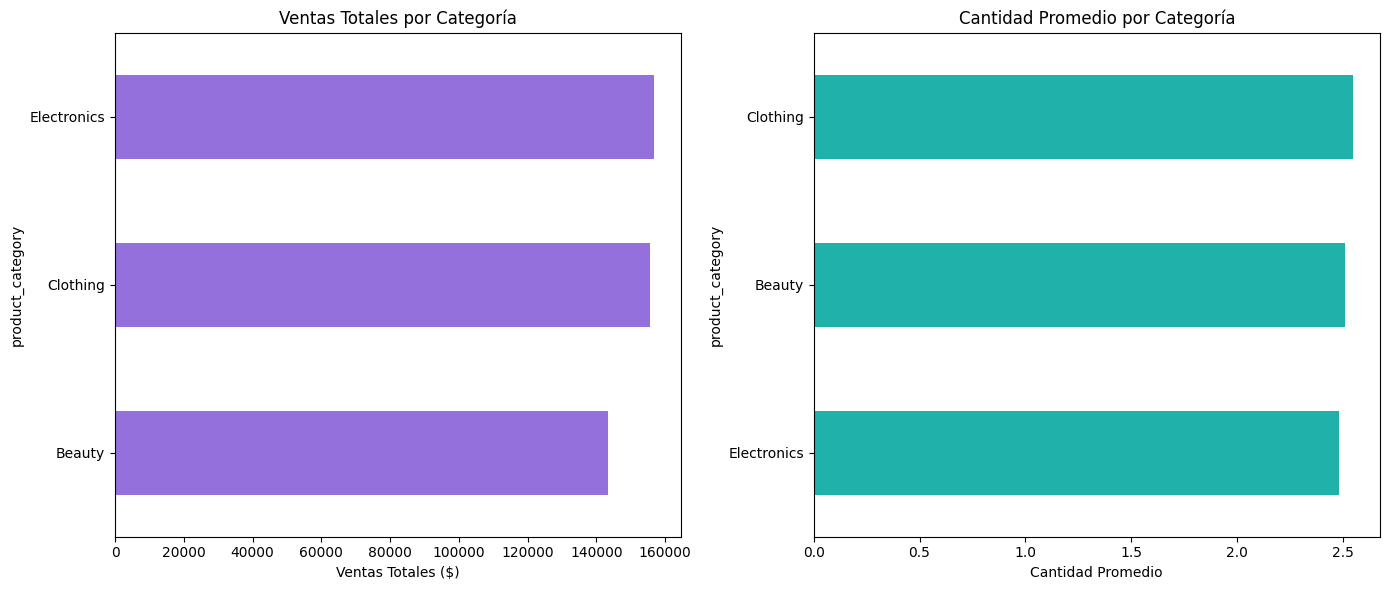

In [ ]:
plt.figure(figsize=(14, 6))

# Ventas totales por categoría
plt.subplot(1, 2, 1)
category_sales = df.groupby('product_category')['total_amount'].sum().sort_values()
category_sales.plot(kind='barh', color='mediumpurple')
plt.title('Ventas Totales por Categoría')
plt.xlabel('Ventas Totales ($)')

# Cantidad promedio por categoría
plt.subplot(1, 2, 2)
category_qty = df.groupby('product_category')['quantity'].mean().sort_values()
category_qty.plot(kind='barh', color='lightseagreen')
plt.title('Cantidad Promedio por Categoría')
plt.xlabel('Cantidad Promedio')

plt.tight_layout()
plt.show()
"""
Los datos revelan una clara oportunidad de optimización entre categorías: mientras Electrónica aporta el 58% de los ingresos ($140k) con baja rotación (0.5 uds/transacción), Belleza presenta la mayor rotación (2 uds/transacción) pero solo el 17% de ingresos ($40k).
Como recomendaciones, se sugiere:
1) Paquetes inteligentes que combinen productos electrónicos, vinculando alto valor con alta frecuencia.
2) Descuentos escalonados en electrónica, para cerrar la brecha de rotación.
3) Ubicación táctica en tiendas, colocando stands de belleza junto a electrónica para impulsar compras complementarias.
"""

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


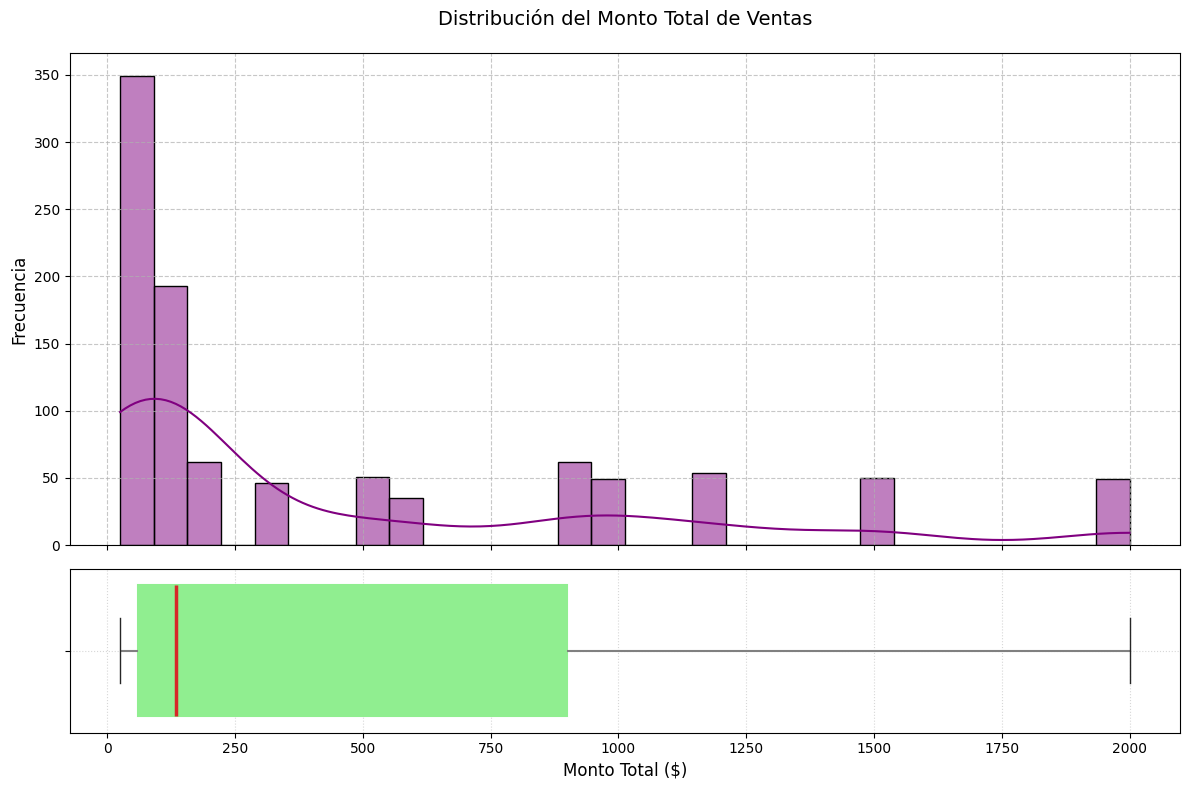

In [ ]:
# Crear figura con subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8),
                             gridspec_kw={'height_ratios': [3, 1]},
                             sharex=True)

# Histograma con KDE
sns.histplot(df['total_amount'], kde=True, bins=30,
             color='purple', ax=ax1)
ax1.set_title('Distribución del Monto Total de Ventas', pad=20, fontsize=14)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Boxplot mejorado
boxprops = dict(linestyle='-', linewidth=1.5, color='lightgreen')
medianprops = dict(linestyle='-', linewidth=2.5, color='#d62728')
whiskerprops = dict(linestyle='-', linewidth=1.5, color='grey')

sns.boxplot(x=df['total_amount'], color='green', ax=ax2,
            boxprops=boxprops, medianprops=medianprops,
            whiskerprops=whiskerprops)
ax2.set_xlabel('Monto Total ($)', fontsize=12)
ax2.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

"""
La distribución de ventas revela que el 75% de las transacciones son menores a $500 (con pico en $250-$300), mientras que solo el 5-10% supera los $1000, generando desproporcionados ingresos.
"""